In [203]:
#### Importando bibliotecas 
!pip install -q seaborn
!pip install -q pandas
!pip install -q sklearn
!pip install -q Pipeline
!pip install -q StandardScaler
!pip install -q seaborn


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
read_data= pd.read_csv('/content/drive/MyDrive/Desafio/parte2/iris.data', sep=',', 
                       names=["Sepal_lengthCm", "Sepal_widthCm", "Petal_lengthCm", "Petal_widthCm", "Species"])


dataset = read_data.copy()
X = dataset.iloc[:, :-1].values # Variáveis ​​independentes
y = dataset.iloc[:, -1].values  # Variável dependente ou alvo (íris-espécie)


In [ ]:
dataset


,Sepal_lengthCm,Sepal_widthCm,Petal_lengthCm,Petal_widthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
## verificar as informações dos dados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sepal_lengthCm  150 non-null    float64
 1   Sepal_widthCm   150 non-null    float64
 2   Petal_lengthCm  150 non-null    float64
 3   Petal_widthCm   150 non-null    float64
 4   Species         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
dataset['Species'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
##Verificando todos os valores nulos
dataset.isnull().sum()


Sepal_lengthCm    0
Sepal_widthCm     0
Petal_lengthCm    0
Petal_widthCm     0
Species           0
dtype: int64

In [ ]:
##Estatística resumida de variáveis quantitativas
dataset.describe()

,Sepal_lengthCm,Sepal_widthCm,Petal_lengthCm,Petal_widthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


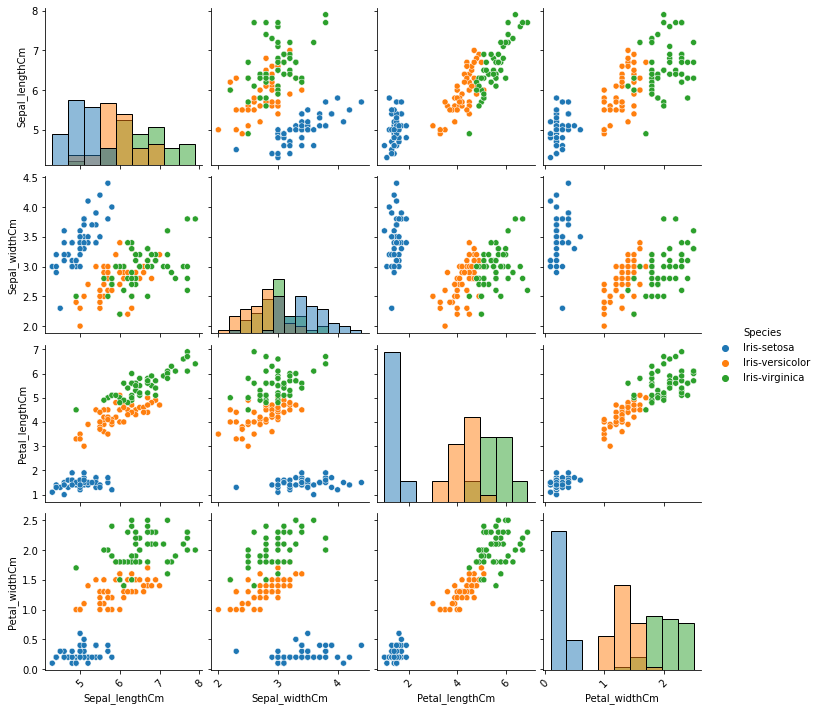

In [ ]:
#Plotar para correlação 

data = sns.pairplot(dataset[["Sepal_lengthCm", "Sepal_widthCm", "Petal_lengthCm", "Petal_widthCm", "Species"]],hue="Species", diag_kind="hist")

 
for ax in data.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)



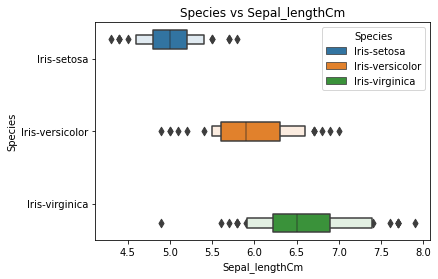

In [ ]:
plt.title('Species vs Sepal_lengthCm')
sns.boxenplot(data= dataset, x = 'Sepal_lengthCm', y= 'Species', hue = 'Species')



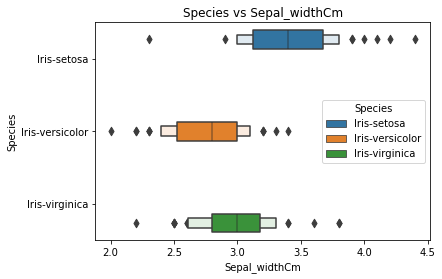

In [ ]:
plt.title('Species vs Sepal_widthCm')
sns.boxenplot(data= dataset, x = 'Sepal_widthCm', y= 'Species', hue = 'Species')


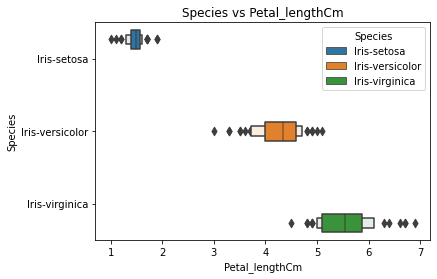

In [ ]:
plt.title('Species vs Petal_lengthCm')
sns.boxenplot(data= dataset, x = 'Petal_lengthCm', y= 'Species', hue = 'Species')

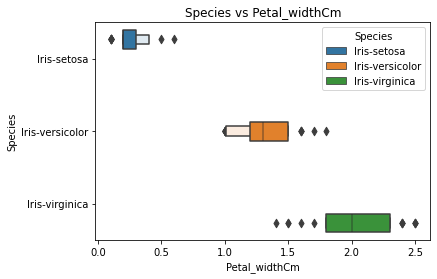

In [ ]:
plt.title('Species vs Petal_widthCm')
sns.boxenplot(data= dataset, x = 'Petal_widthCm', y= 'Species', hue = 'Species')




####Matriz de Coorelação

In [ ]:
dataset.corr()

,Sepal_lengthCm,Sepal_widthCm,Petal_lengthCm,Petal_widthCm
Sepal_lengthCm,1.000000,-0.109369,0.871754,0.817954
Sepal_widthCm,-0.109369,1.000000,-0.420516,-0.356544
Petal_lengthCm,0.871754,-0.420516,1.000000,0.962757
Petal_widthCm,0.817954,-0.356544,0.962757,1.000000


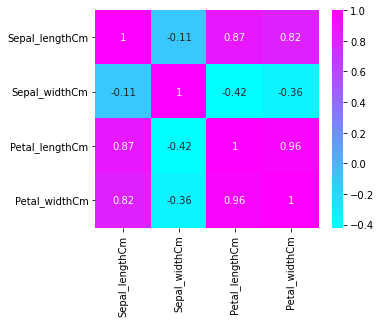

In [ ]:
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'cool')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
dataset['Species'] = le.fit_transform(dataset['Species'])
dataset.head()

,Sepal_lengthCm,Sepal_widthCm,Petal_lengthCm,Petal_widthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


####Treinamento o modelo

In [263]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = dataset.drop(columns=['Species'])
Y = dataset['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [264]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [265]:
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [266]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [267]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [268]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [269]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


In [270]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
modelT = DecisionTreeClassifier()

In [271]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [272]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)


Accuracy:  93.33333333333333


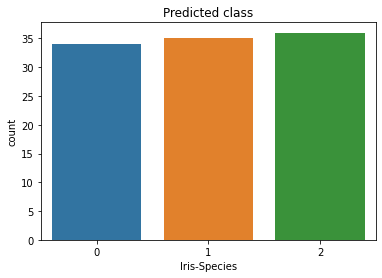

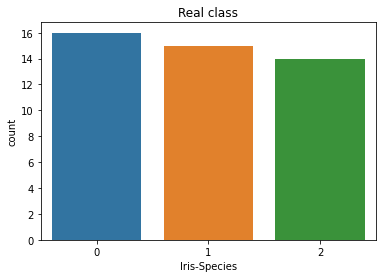

In [273]:
sns.countplot( y_train, data=dataset)
plt.title('Predicted class')
plt.xlabel('Iris-Species')
plt.show()
sns.countplot(y_test,  data=dataset)
plt.title('Real class')
plt.xlabel('Iris-Species')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')